In [125]:
%matplotlib inline
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
# print(plt.style.available)  # show available template
plt.style.use(['seaborn-ticks','seaborn-paper'])  # use a templet

import matplotlib as mpl
# mpl.rcParams['lines.linewidth'] = 2
# mpl.rcParams['lines.color'] = 'r'
params = {
    'figure.figsize': [8, 6], # Note! figure unit is inch!  scale fontz size 2.54 to looks like unit cm
    'axes.labelsize': 10*2.54, # scale 2.54 to change to figure unit looks as cm
    'font.size':  7*2.54,
    'lines.linewidth':2,
    'legend.fontsize': 8*2.54,
    'xtick.labelsize': 8*2.54,
    'ytick.labelsize': 6*2.54,
    'text.usetex': False,  
    'xtick.direction': "in",
    'ytick.direction': "in", # ticket inside
    'legend.frameon' : True, 
    'legend.edgecolor': 'black',
    'legend.shadow': True,
    'legend.framealpha':1,
#     'patch.linewidth' : 0.5, 
}
mpl.rcParams.update(params)
mpl.rcParams.update(params)
import numpy as np

In [7]:
f = [0.75096949, 0.84749486, 0.89978349, 0.92989822, 0.94848623,
       0.96065877, 0.96902428, 0.97500392, 0.97941853, 0.98276659,
       0.98536402, 0.98741844, 0.98907067, 0.99041884, 0.99153299,
       0.99246415, 0.99325019, 0.9939197 , 0.99449458, 0.99499181,
       0.99542476, 0.99580401, 0.99613809, 0.99643388, 0.996697  ,
       0.9969321 , 0.997143  , 0.99733291, 0.99750453, 0.99766013,
       0.99780164, 0.9979307 , 0.99804875, 0.99815698, 0.99825647,
       0.99834812, 0.99843274, 0.99851103, 0.9985836 , 0.998651  ,
       0.9987137 , 0.99877214, 0.99882669, 0.99887769, 0.99892543,
       0.9989702 , 0.99901222, 0.99905173, 0.99908892, 0.99912396,
       0.99915702, 0.99918825, 0.99921777, 0.99924572, 0.99927219,
       0.99929729, 0.99932112, 0.99934376, 0.99936528, 0.99938576,
       0.99940527, 0.99942386, 0.9994416 , 0.99945853, 0.9994747 ,
       0.99949015, 0.99950494, 0.99951909, 0.99953264, 0.99954563,
       0.99955808, 0.99957003, 0.9995815 , 0.99959251, 0.9996031 ,
       0.99961328, 0.99962307, 0.9996325 , 0.99964158, 0.99965032,
       0.99965875, 0.99966687, 0.99967471, 0.99968228, 0.99968958,
       0.99969664, 0.99970345, 0.99971004, 0.99971641, 0.99972258,
       0.99972854, 0.99973432, 0.99973991, 0.99974532, 0.99975057,
       0.99975566, 0.99976059, 0.99976538, 0.99977002, 0.99977453]
tao = [0.56434786, 0.47036452, 0.40955292, 0.36588384, 0.33241072,
       0.30583878, 0.2840519 , 0.26578582, 0.25025868, 0.2368223 ,
       0.22506186, 0.21465306]
p = [0.0001394651445725259,
 0.00015708243117244655,
 0.0005221168210293375,
 0.0005249213844928935,
 0.0005575077525994775,
 0.0007305221201447415,
 0.0008244531793706473,
 0.0009080133612549002,
 0.0010408394167522594,
 0.0010482039518333597]
p1 = [9.129491020497352e-05,
 0.00020369254983836066,
 0.0004353642953244252,
 0.0005510490828068025,
 0.000588817160067621,
 0.0006541807506955855,
 0.0009939967993850551,
 0.0014265821176313587,
 0.001454019927007777,
 0.0014950078063995509]
x0 = [0.07037424, 0.19898876, 0.23524384]
x1 = [0.07063919, 0.19967419, 0.23616219]

In [5]:
def draw(z_list,zz_list,t_list,tt_list,v):
#     ax = plt.axes()
    plt.xlim(-11,11)
    plt.ylim(-11,11)
    N = len(z_list)
    T_list =  np.append([-t for t in t_list[::-1]],t_list)
    TT_list =  np.append([-t for t in tt_list[::-1]],tt_list)
    x = 0
    y = 0
    X = 0
    Y = 0
    dx = 0
    dy = z_list[0]
    Dx = zz_list[0] * np.sin(2*np.pi*z_list[0]*v*0.0002)
    Dy = zz_list[0] * np.cos(2*np.pi*z_list[0]*v*0.0002)
    theta = 0
    Theta = 0
    plt.arrow(x, y, dx, dy,head_width=0.3, head_length=0.3, fc='r', ec='r',width=0.15)
    plt.arrow(X, Y, Dx, Dy,head_width=0.3, head_length=0.3, fc='b', ec='b',width=0.15,ls='--')
    for i in range(N-1):
        x = x + dx
        y = y + dy
        X = X + Dx
        Y = Y + Dy
        dt = T_list[i+1] - T_list[i]
        Dt = TT_list[i+1] - TT_list[i]
        theta = theta + 2*np.pi*dt*v
        Theta = Theta + 2*np.pi*Dt*v
        dx = z_list[i+1] * np.sin(theta)
        dy = z_list[i+1] * np.cos(theta)
        Dx = zz_list[i+1] * np.sin(Theta)
        Dy = zz_list[i+1] * np.cos(Theta)
        plt.arrow(x, y, dx, dy,head_width=0.4, head_length=0.4, fc='r', ec='r',width=0.15)
        plt.arrow(X, Y, Dx, Dy,head_width=0.4, head_length=0.4, fc='b', ec='b',width=0.15,ls='--')

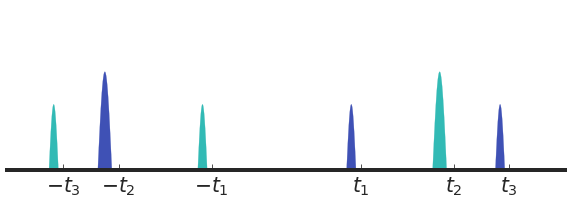

In [130]:
plt.figure(figsize=(10,3))
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
for pos in ['right', 'top', 'left']:
    plt.gca().spines[pos].set_visible(False)
    plt.gca().spines[pos].set_color('#dddddd')
plt.gca().spines['bottom'].set_linewidth(4)
plt.ylim(0,0.5)
plt.xlim(-3,3)
plt.xticks([-2.4, -1.8 ,-0.8, 0.8, 1.8, 2.4],(r'$-t_3$',r'$-t_2$',r'$-t_1$',r'$t_1$',r'$t_2$',r'$t_3$'))
x1=np.linspace(-2.6,-2.4,100)
y1=0.2*np.cos(np.pi*(x1+2.5)/0.1)
plt.fill(x1,y1,color='#32bab5')
x2=np.linspace(-2.1,-1.8,100)
y2=0.3*np.cos(np.pi*(x2+1.95)/0.15)
plt.fill(x2,y2,color='#3F51B5')
x3=np.linspace(-1,-0.8,100)
y3=0.2*np.cos(np.pi*(x3+0.9)/0.1)
plt.fill(x3,y3,color='#32bab5')
x4=np.linspace(0.6,0.8,100)
y4=0.2*np.cos(np.pi*(x4-0.7)/0.1)
plt.fill(x4,y4,color='#3F51B5')
x5=np.linspace(1.5,1.8,100)
y5=0.3*np.cos(np.pi*(x5-1.65)/0.15)
plt.fill(x5,y5,color='#32bab5')
x6=np.linspace(2.2,2.4,100)
y6=0.2*np.cos(np.pi*(x4-2.3)/0.1)
plt.fill(x6,y6,color='#3F51B5')
plt.savefig('../fig/sequece.pdf')